## Develop a program to demonstrate the working of Linear Regression and Polynomial Regression. Use Boston Housing Dataset for Linear Regression and Auto MPG Dataset (for vehicle fuel efficiency prediction) for Polynomial Regression.


### Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing sk-learn dependencies 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml


In [2]:
data = fetch_openml(name="boston", version=1, as_frame=True)

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.to_csv("./datasets/boston_housing.csv")
df['TARGET'] = data.target

In [4]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

In [5]:
# Converting the vallues into numerical type \
X = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values
X.fillna(X.mean(), inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [7]:
# Instantiating model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making Predicting (Testing)
y_pred = model.predict(X_test)

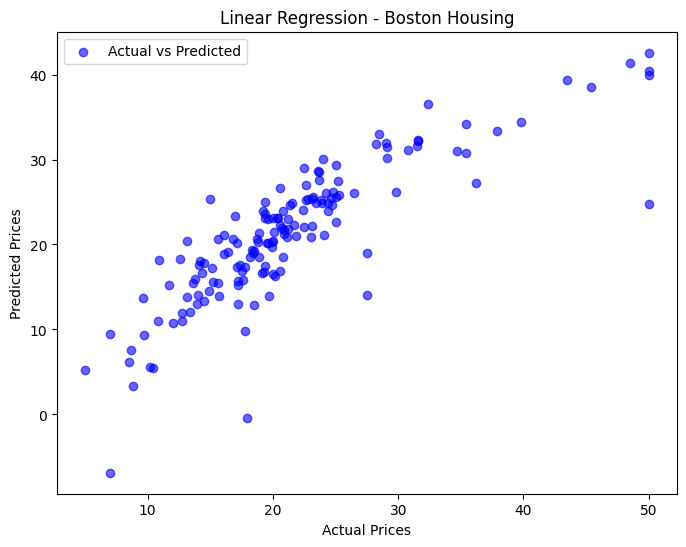

In [8]:
# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')
plt.plot()
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression - Boston Housing')
plt.legend()
plt.show()

In [9]:
mean_squared_error(y_test, y_pred)

21.517444231177183

In [10]:
r2_score(y_test, y_pred)

0.7112260057484936

In [11]:
model.score(X_test, y_test)

0.7112260057484936

### Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
df = pd.read_csv("./auto_mpg_dataset.csv")

In [27]:
df['horsepower'] = df['horsepower'].replace('?',np.nan).astype(float)
df.dropna(inplace = True)

In [28]:
X = df[['horsepower']]
y = df['mpg']

In [29]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [31]:
PR_model = LinearRegression()
PR_model.fit(X_train_poly, y_train)

LinearRegression()

In [35]:
y_pred = PR_model.predict(X_test_poly)

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 18.4170
R^2 Score: 0.6392


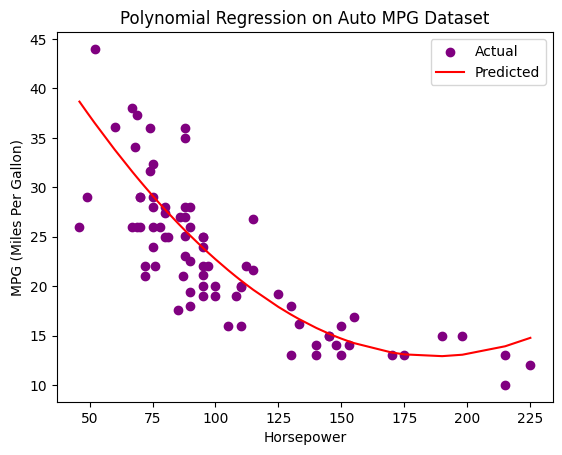

In [34]:
plt.scatter(X_test, y_test, color='purple', label='Actual')
sorted_indices = X_test.squeeze().argsort()
plt.plot(X_test.iloc[sorted_indices], y_pred[sorted_indices], color='red', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG (Miles Per Gallon)')
plt.title('Polynomial Regression on Auto MPG Dataset')
plt.legend()
plt.show()